# TensorFlow-GPU model for MNIST dataset

In [ ]:
# Original: https://www.tensorflow.org/overview/
# 
# From begining install Tensorflow-GPU by 
# https://www.thehardwareguy.co.uk/install-tensorflow-gpu
# and look to this comment below article: 
# "In tensorflow = 2.1.0, it is not needed to install keras separately 
# (pip install keras not needed) and it will be installed (keras =2.2.4-tf) 
# as a dependency of tensorflow-gpu with "conda install" itself.

# it's work for me in Win10
# GOOD LUCK :)

In [ ]:
# Config TF
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
class Data:
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.x_train, self.y_train),(self.x_test, self.y_test) = mnist.load_data(path="mnist.npz")
        self.x_train = self.x_train / 255.0
        self.x_test = self.x_test / 255.0

In [160]:
def train(data, hidden_layer, learning_rate, epochs):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hidden_layer, activation='relu'),
        tf.keras.layers.Dropout(learning_rate),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    model.fit(data.x_train, data.y_train, epochs=epochs)
    res = model.evaluate(x=data.x_test, y=data.y_test, return_dict=True)
    return res

In [165]:
data = Data()
print(len(data.x_train))

60000


In [ ]:
# lr_list = [0.2, 0.1, 0.05, 0.02]
lr_list = [0.2]
# ep_list = range(6, 12, 1)
ep_list = [5]
hidden_layer=128

results = list()
results_df = pd.DataFrame(columns=['lr', 'ep', 'loss', 'acc'])

cycle = 1
all_cycles = len(lr_list) * len(ep_list)
for lr in lr_list:
    for ep in ep_list:
        print(f"--- cycle {cycle} of {all_cycles} ---")
        print(f"learning_rate={lr}, num_ep={ep}")
        r = train(data, hidden_layer, lr, ep)
        results = results.append((lr, ep, r['loss'], r['accuracy']))
        cycle += 1

results_df.append(results, ignore_index=True)
print(results

In [269]:
# Defaults
# ep_list = [5]
# lr_list = [0.2]
hidden_layer=120

lr_list = [0.2, 0.15, 0.1, 0.05, 0.02, 0.01]
ep_list = range(3, 20, 1)

results = list()
cycle = 1
all_cycles = len(lr_list) * len(ep_list)
for lr in lr_list:
    for ep in ep_list:
        print(f"--- cycle {cycle} of {all_cycles} ---")
        print(f"learning_rate={lr}, num_ep={ep}")
        r = train(data, hidden_layer, lr, ep)
        results.append({
            'n': cycle,
            'lr': lr, 'ep': ep, 
            'loss': r['loss'], 
            'acc': r['accuracy']
        })
        cycle += 1


--- cycle 1 of 102 ---
learning_rate=0.2, num_ep=3
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.9135
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1434 - accuracy: 0.9577
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9731
--- cycle 2 of 102 ---
learning_rate=0.2, num_ep=4
Epoch 1/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3013 - accuracy: 0.9119
Epoch 2/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1479 - accuracy: 0.9561
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.9647
Epoch 4/4
313/313 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9760
--- cycle 3 of 102 ---
learning_rate=0.2, num_ep=5
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2911 - accuracy: 0.9172
Epoch 2/5
1875/1875 [======================

Epoch 8/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0559 - accuracy: 0.9818
Epoch 9/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0501 - accuracy: 0.9838
Epoch 10/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0469 - accuracy: 0.9846
Epoch 11/11
313/313 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9800
--- cycle 10 of 102 ---
learning_rate=0.2, num_ep=12
Epoch 1/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3079 - accuracy: 0.9098
Epoch 2/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1484 - accuracy: 0.9565
Epoch 3/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1126 - accuracy: 0.9663
Epoch 4/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0932 - accuracy: 0.9710
Epoch 5/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0773 - accuracy: 0.9758
Epoch 6/12
1875/1875 [=======

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9874
Epoch 14/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0353 - accuracy: 0.9883
Epoch 15/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0340 - accuracy: 0.9880
Epoch 16/16
313/313 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9812
--- cycle 15 of 102 ---
learning_rate=0.2, num_ep=17
Epoch 1/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3025 - accuracy: 0.9122
Epoch 2/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1495 - accuracy: 0.9556
Epoch 3/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.9662
Epoch 4/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0932 - accuracy: 0.9718
Epoch 5/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0785 - accuracy: 0.9754
Epoch 6/17
1875/1875 [=================

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1361 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1006 - accuracy: 0.9690
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0827 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9775
--- cycle 21 of 102 ---
learning_rate=0.15, num_ep=6
Epoch 1/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2945 - accuracy: 0.9143
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1393 - accuracy: 0.9585
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1033 - accuracy: 0.9686
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0821 - accuracy: 0.9746
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0679 - accuracy: 0.9787
Epoch 6/6
313/313 [==============================]

Epoch 1/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2899 - accuracy: 0.9155
Epoch 2/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1369 - accuracy: 0.9595
Epoch 3/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1018 - accuracy: 0.9690
Epoch 4/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 5/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0703 - accuracy: 0.9782
Epoch 6/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0601 - accuracy: 0.9808
Epoch 7/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0536 - accuracy: 0.9834
Epoch 8/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0478 - accuracy: 0.9844
Epoch 9/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0413 - accuracy: 0.9864
Epoch 10/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.040

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0298 - accuracy: 0.9899
Epoch 15/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0275 - accuracy: 0.9904
Epoch 16/17
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0258 - accuracy: 0.9908
Epoch 17/17
313/313 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9819
--- cycle 33 of 102 ---
learning_rate=0.15, num_ep=18
Epoch 1/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2867 - accuracy: 0.9178
Epoch 2/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1385 - accuracy: 0.9595
Epoch 3/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1021 - accuracy: 0.9692
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0825 - accuracy: 0.9749
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0684 - accuracy: 0.9783
Epoch 6/18
1875/1875 [================

313/313 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9762
--- cycle 40 of 102 ---
learning_rate=0.1, num_ep=8
Epoch 1/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9181
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1310 - accuracy: 0.9613
Epoch 3/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0940 - accuracy: 0.9708
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0752 - accuracy: 0.9765
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0615 - accuracy: 0.9808
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0540 - accuracy: 0.9824
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0461 - accuracy: 0.9850
Epoch 8/8
313/313 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9776
--- cycle 41 of 102 ---
learning_rate=0.1, num_ep=9
E

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0750 - accuracy: 0.9768
Epoch 5/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0615 - accuracy: 0.9808
Epoch 6/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 7/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0447 - accuracy: 0.9854
Epoch 8/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0408 - accuracy: 0.9862
Epoch 9/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0353 - accuracy: 0.9887
Epoch 10/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 11/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0287 - accuracy: 0.9902
Epoch 12/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 13/14
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0251 - accu

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0279 - accuracy: 0.9908
Epoch 12/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0281 - accuracy: 0.9897
Epoch 13/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0239 - accuracy: 0.9919
Epoch 14/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0221 - accuracy: 0.9927
Epoch 15/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 16/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 17/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 18/18
313/313 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9811
--- cycle 51 of 102 ---
learning_rate=0.1, num_ep=19
Epoch 1/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.9208
Epoch 2/19
1875/1875 [=============

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0527 - accuracy: 0.9837
Epoch 6/9
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0447 - accuracy: 0.9861
Epoch 7/9
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 8/9
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 9/9
313/313 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9793
--- cycle 59 of 102 ---
learning_rate=0.05, num_ep=10
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2749 - accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1242 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0875 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 5/10
1875/1875 [=======================

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1242 - accuracy: 0.9628
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0899 - accuracy: 0.9735
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0674 - accuracy: 0.9786
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0558 - accuracy: 0.9824
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0326 - accuracy: 0.9895
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 11/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0227 - accura

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0554 - accuracy: 0.9823
Epoch 6/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0469 - accuracy: 0.9846
Epoch 7/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0387 - accuracy: 0.9873
Epoch 8/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0328 - accuracy: 0.9901
Epoch 9/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 10/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0251 - accuracy: 0.9912
Epoch 11/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 12/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 13/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 14/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0175 - acc

Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0414 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9902
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0242 - accuracy: 0.9923
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9764
--- cycle 77 of 102 ---
learning_rate=0.02, num_ep=11
Epoch 1/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2616 - accuracy: 0.9252
Epoch 2/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1167 - accuracy: 0.9651
Epoch 3/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0812 - accuracy: 0.9753
Epoch 4/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0622 - accuracy: 0.9804
Epoch 5/11
1875/1875 [=======

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 15/15
313/313 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9779
--- cycle 82 of 102 ---
learning_rate=0.02, num_ep=16
Epoch 1/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2681 - accuracy: 0.9237
Epoch 2/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1224 - accuracy: 0.9641
Epoch 3/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0842 - accuracy: 0.9747
Epoch 4/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0647 - accuracy: 0.9797
Epoch 5/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9841
Epoch 6/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9872
Epoch 7/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0341 - accuracy: 0.9892
Epoch 8/16
1875/1875 [==================

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 15/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 16/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0112 - accuracy: 0.9962
Epoch 17/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 18/19
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0101 - accuracy: 0.9963
Epoch 19/19
313/313 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.9798
--- cycle 86 of 102 ---
learning_rate=0.01, num_ep=3
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2627 - accuracy: 0.9242
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1174 - accuracy: 0.9657
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9723
--- cycle 87 of 102 ---
learning_rate=0.01

Epoch 1/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2641 - accuracy: 0.9248
Epoch 2/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1198 - accuracy: 0.9646
Epoch 3/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0829 - accuracy: 0.9750
Epoch 4/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0627 - accuracy: 0.9807
Epoch 5/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0495 - accuracy: 0.9846
Epoch 6/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 7/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0330 - accuracy: 0.9894
Epoch 8/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 9/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 10/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0401 - accuracy: 0.9872
Epoch 7/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 8/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 9/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0215 - accuracy: 0.9934
Epoch 10/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 11/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0162 - accuracy: 0.9950
Epoch 12/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 13/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 14/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 15/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0101 - ac

In [270]:
results_df = pd.DataFrame(columns=['n', 'lr', 'ep', 'loss', 'acc'])
results_df = results_df.append(results, ignore_index=True).sort_values('acc', ascending=False)
print(results_df.head())

     n    lr  ep      loss     acc
31  32  0.15  17  0.069580  0.9819
15  16  0.20  18  0.072311  0.9817
43  44  0.10  12  0.072317  0.9814
50  51  0.10  19  0.081605  0.9814
10  11  0.20  13  0.070848  0.9814


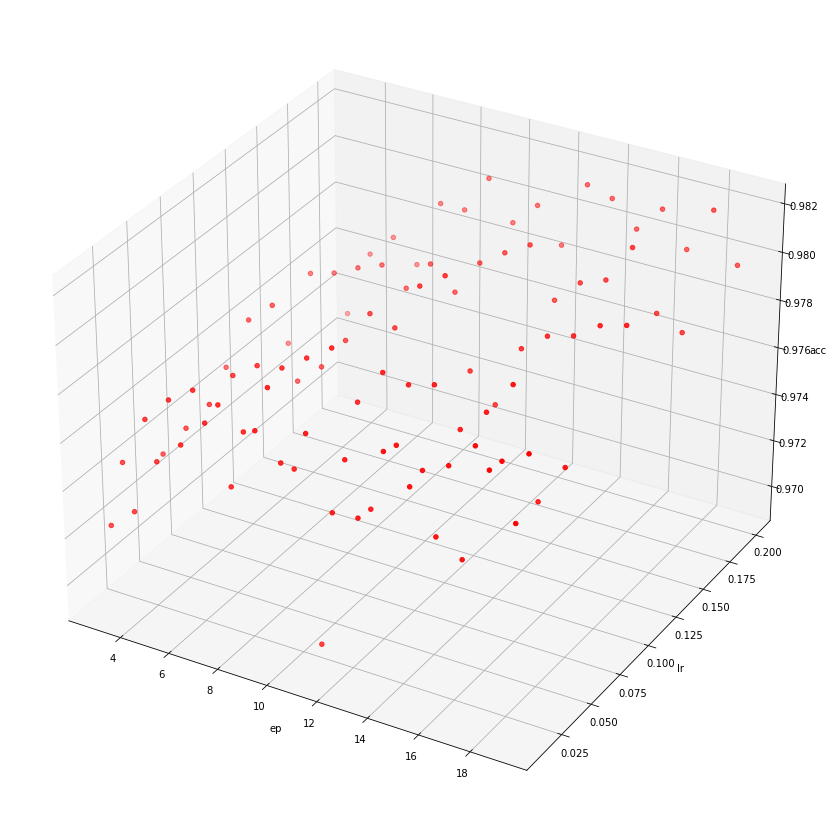

In [271]:
g = results_df[['ep', 'lr', 'acc']]
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")

x = g['ep']
y = g['lr']
z = g['acc']

ax.scatter(x,y,z, color='red')
ax.set_xlabel('ep')
ax.set_ylabel('lr')
ax.set_zlabel('acc')

plt.show()